#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

#Importing dataset

In [ ]:
df = pd.read_csv('Diabetes_predict.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(x)

[['Female' 80.0 0 ... 25.19 6.6 140]
 ['Female' 54.0 0 ... 27.32 6.6 80]
 ['Male' 28.0 0 ... 27.32 5.7 158]
 ...
 ['Male' 70.0 0 ... 27.32 6.5 130]
 ['Female' 80.0 0 ... 33.2 6.6 160]
 ['Female' 62.0 0 ... 27.32 5.8 90]]


In [ ]:
print(y)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

#Solving for missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer.fit(x[:, 1:3])


SimpleImputer()

In [ ]:
print(x)

[['Female' 80.0 0 ... 25.19 6.6 140]
 ['Female' 54.0 0 ... 27.32 6.6 80]
 ['Male' 28.0 0 ... 27.32 5.7 158]
 ...
 ['Male' 70.0 0 ... 27.32 6.5 130]
 ['Female' 80.0 0 ... 33.2 6.6 160]
 ['Female' 62.0 0 ... 27.32 5.8 90]]


In [ ]:
print(y)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

#Univariate Analysis

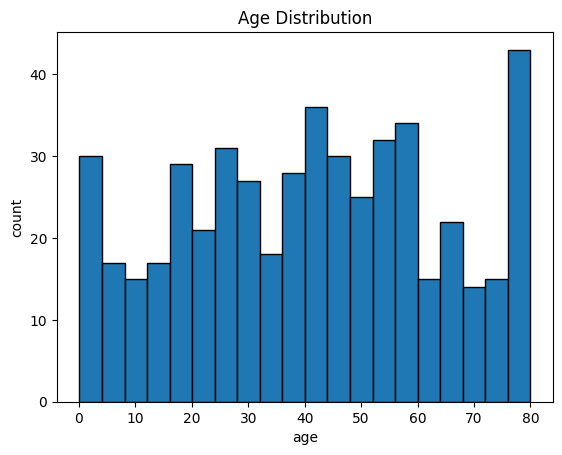

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

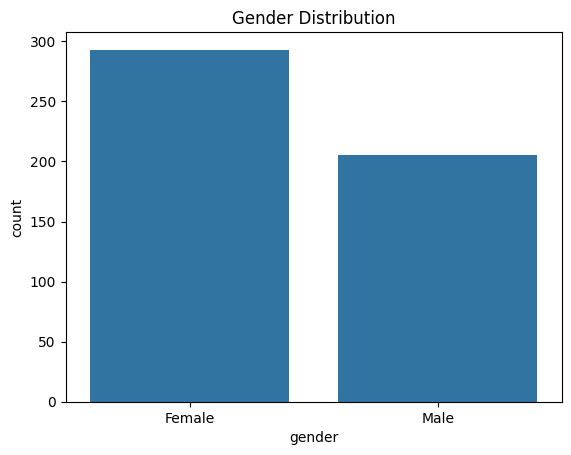

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

<ipython-input-213-a4d595fc7f51>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=20)


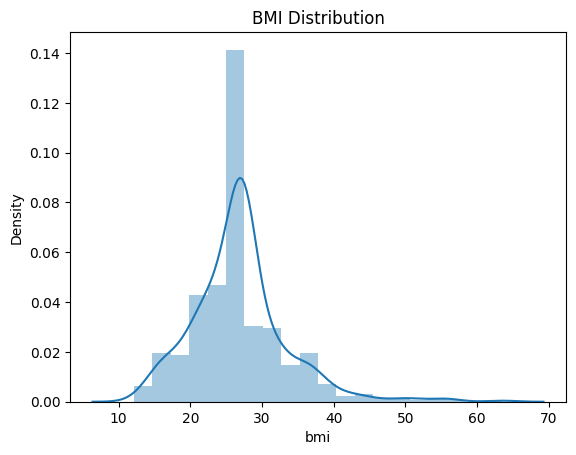

In [ ]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=20)
plt.title('BMI Distribution')
plt.show()

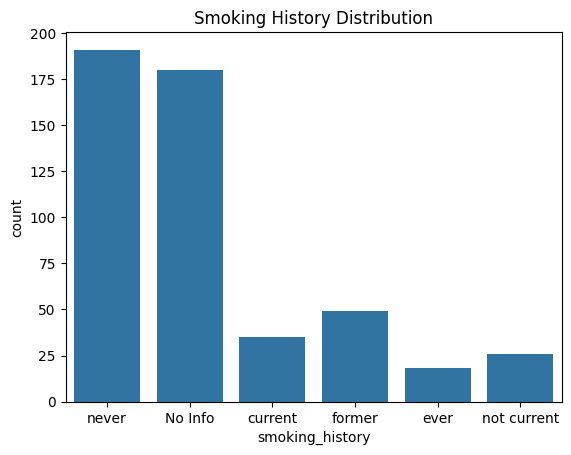

In [ ]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

#Class Imbalancing

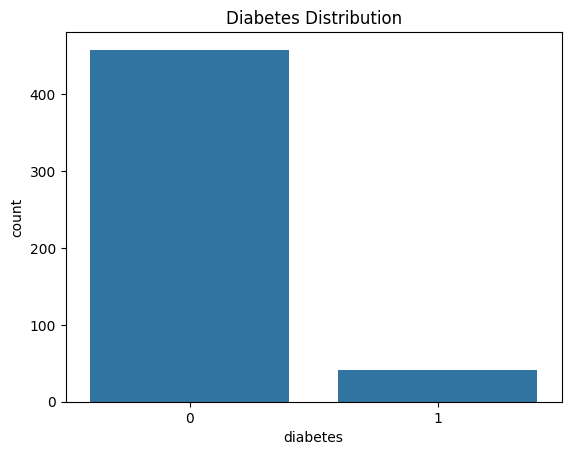

In [ ]:
#Here in this code we are going to check the class imbalnce
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

#Data preprocessing

In [ ]:
# Data Preprocessing
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_history'] = LabelEncoder().fit_transform(df['smoking_history'])
X = df.drop('diabetes', axis=1)
y = df['diabetes']
print(X)
print(y)


     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0             0              1                4  25.19   
1         0  54.0             0              0                0  27.32   
2         1  28.0             0              0                4  27.32   
3         0  36.0             0              0                1  23.45   
4         1  76.0             1              1                1  20.14   
..      ...   ...           ...            ...              ...    ...   
494       0  60.0             0              0                4  28.82   
495       1   4.0             0              0                0  15.64   
496       1  70.0             0              0                0  27.32   
497       0  80.0             0              0                4  33.20   
498       0  62.0             0              0                0  27.32   

     HbA1c_level  blood_glucose_level  
0            6.6                  140  
1            6.6               

#Logistic Regression

In [ ]:
#Training Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(X_train)
print(y_train)

[[-0.80979707  0.46854851 -0.26401722 ...  0.69235533 -1.46480072
   1.51879782]
 [ 1.20963438  1.033192   -0.26401722 ... -0.15337593  0.35451597
   0.45019366]
 [-0.80979707 -1.65972311 -0.26401722 ...  0.66016487 -1.91962989
  -0.26220911]
 ...
 [ 1.20963438 -1.74659134 -0.26401722 ... -1.7160766   0.35451597
  -0.00777955]
 [-0.80979707  1.6412696  -0.26401722 ... -0.2411681  -0.73707404
   0.47563662]
 [-0.80979707 -1.13851374 -0.26401722 ...  0.04415646 -0.73707404
   1.51879782]]
30     0
444    0
449    0
197    0
432    0
      ..
412    0
223    0
271    0
474    0
355    0
Name: diabetes, Length: 399, dtype: int64


#Splitting of dataset

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
30        0  53.0             0              0                0  31.75   
444       1  66.0             0              0                0  25.97   
449       0   4.0             0              0                4  31.53   
197       1  76.0             0              0                4  23.93   
432       1  42.0             0              0                0  27.32   
..      ...   ...           ...            ...              ...    ...   
412       0  25.0             0              0                4  25.23   
223       0  60.0             0              0                3  34.31   
271       1   2.0             0              0                0  15.29   
474       0  80.0             0              0                4  25.37   
355       0  16.0             0              0                0  27.32   

     HbA1c_level  blood_glucose_level  
30           4.0                  200  
444          6.0               

#Standardization of dataset

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[-0.80979707  0.46854851 -0.26401722 ...  0.69235533 -1.46480072
   1.51879782]
 [ 1.20963438  1.033192   -0.26401722 ... -0.15337593  0.35451597
   0.45019366]
 [-0.80979707 -1.65972311 -0.26401722 ...  0.66016487 -1.91962989
  -0.26220911]
 ...
 [ 1.20963438 -1.74659134 -0.26401722 ... -1.7160766   0.35451597
  -0.00777955]
 [-0.80979707  1.6412696  -0.26401722 ... -0.2411681  -0.73707404
   0.47563662]
 [-0.80979707 -1.13851374 -0.26401722 ...  0.04415646 -0.73707404
   1.51879782]]
[[ 1.20963438  0.55541674 -0.26401722 -0.19764235 -0.67746583  0.04415646
   0.35451597 -1.53435692]
 [ 1.20963438 -1.70315723 -0.26401722 -0.19764235 -1.20956989  0.04415646
  -1.91962989  0.37386479]
 [ 1.20963438  0.42511439 -0.26401722 -0.19764235  0.91884637  0.04415646
  -0.55514237  0.47563662]
 [ 1.20963438 -1.70315723 -0.26401722 -0.19764235 -1.20956989 -1.65608528
   0.35451597 -0.26220911]
 [ 1.20963438 -1.70315723 -0.26401722 -0.19764235  0.91884637 -1.32393823
   0.90031098 -1.27992736]
 [-

#XGBOOST Model for classification

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve

# Define an XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]),
                          random_state=42)


In [ ]:
# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate precision-recall curve and find the optimal threshold for high recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Set a minimum recall target (e.g., 80%) and find the closest threshold
target_recall = 0.80
optimal_idx = max(i for i, recall in enumerate(recalls) if recall >= target_recall)
optimal_threshold = thresholds[optimal_idx]

# Apply the threshold for final predictions
y_pred = (y_proba >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['0', '1'])

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Optimal Threshold for {target_recall} Recall: {optimal_threshold}")


Confusion Matrix:
 [[91  2]
 [ 1  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.75      0.86      0.80         7

    accuracy                           0.97       100
   macro avg       0.87      0.92      0.89       100
weighted avg       0.97      0.97      0.97       100

Optimal Threshold for 0.8 Recall: 0.7247812747955322
